In [ ]:
#                                              Image Classification Using Random Forest Classifier - Fashion-MINST Dataset - Group 19

In [ ]:
#                                                         IMPORTING LIBRARIES AND LOADING FASHION-MINST DATASET

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, auc, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Loading fashion-MINST dataset using tensor flow and concatenating test and train data.
#So that we divide the entire dataset as train, validate and test datasets.
#import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
#                                            DATA PREPARATION (Cleaning & Normalization) AND TRANSFORMATION (Flattening) - Using Training Data

In [ ]:
#Data Preparation Step
#Data Cleansing - In this cell we are checking for missing values in image dataset and labels.
#fashion-MINST dataset from tensor flow is clean
nan_fmn_images_train=np.isnan(train_images).sum()
nan_fmn_labels_train=np.isnan(train_labels).sum()

nan_fmn_images_test=np.isnan(test_images).sum()
nan_fmn_labels_test=np.isnan(test_labels).sum()

print("Number of missing values in Train image dataset : ", nan_fmn_images_train)
print("Number of missing labels : ", nan_fmn_labels_train)


print("Number of missing values in Test image dataset : ", nan_fmn_images_test)
print("Number of missing labels : ", nan_fmn_labels_test)

'''
We can see that the no datapoint in fashionMNIST is n/a or nan.
we are using fmn_images and fmn_labels instead of nan_fmn_images and nan_fmn_labels since we do not have any missing values.

'''

Number of missing values in Train image dataset :  0
Number of missing labels :  0
Number of missing values in Test image dataset :  0
Number of missing labels :  0


'\nWe can see that the no datapoint in fashionMNIST is n/a or nan.\nwe are using fmn_images and fmn_labels instead of nan_fmn_images and nan_fmn_labels since we do not have any missing values.\n\n'

In [ ]:
# Data Transformation - Classifying Fashion-MNIST dataset with normalization
# Brief overview of normalizing image data for RandomForestClassifier:
# Normalization is not strictly necessary for Random Forests since:
# 1. Random Forests are based on decision trees that rely on feature thresholds for splitting and are scale-invariant.
# 2. The relative importance of features, rather than their absolute values, drives decision-making.

# Normalizing can still be beneficial when:
# 1. Visualizing the data or exploring feature importance for model interpretation.
# 2. Ensuring uniformity when combining Random Forests with other preprocessing techniques or algorithms.

# Common Normalization Techniques for Image Data:
# 1. Dividing by 255: Scales pixel values (0-255) to a range [0, 1] suitable for image analysis.
# 2. Min-Max Scaling: Also scales values to [0, 1], similar to dividing by 255, but may apply to datasets outside the 8-bit grayscale range.
# 3. Z-Score Normalization: Not ideal for images since it centers values around 0 and scales by standard deviation, which is less interpretable for image pixels.

# Load and preprocess Fashion-MNIST images
# Train and test datasets contain grayscale images with pixel values ranging from 0 to 255
# Normalize pixel values by dividing by 255

fmn_images_scaled_train = train_images/255
fmn_images_scaled_test = test_images/255

In [ ]:
# Flattening the scaled image data for use in machine learning models
# Explanation:
# Many traditional machine learning algorithms (e.g., Random Forest, Decision Tree, KNN) require 1D feature vectors as input.
# The Fashion-MNIST dataset consists of 28x28 grayscale images, which need to be flattened into 1D arrays for these models.

x_train_flatten = fmn_images_scaled_train.reshape(fmn_images_scaled_train.shape[0], -1)
x_test_flatten = fmn_images_scaled_test.reshape(fmn_images_scaled_test.shape[0], -1)

In [ ]:
#Converting the flattened dataset to pandas to perform varoius visulization activities

fmn_pd_df_train=pd.DataFrame(x_train_flatten)
label_df_train=pd.DataFrame(train_labels)

In [ ]:
# Using min-max scalar for normalization - checking if dividing by 255 and min-max scaler is same and gives same mean and std-deviation of image dataset.
# This basically requires flattening of data, so performing normalization after flattening.

# Create the scaler
scaler = MinMaxScaler()

train_images_data = train_images

# Fit the scaler on your data and transform it
X_normalized = scaler.fit_transform(train_images_data.reshape(train_images_data.shape[0], -1))

In [ ]:
#                                                                     Exploratory Data Analysis (EDA)

In [ ]:
# Exploratory Data Analysis (EDA)
# Firstly, we describe the images data and labels.

# Printing shapes of the data:
print("Train dataset images shape:", train_images.shape)
print("Train dataset labels shape:", train_labels.shape)
# Printing labels
print("Lables set : ", set(train_labels))

'''The given fashionMNIST dataset contains total 70000 images. TRain - 60,000 and Test - 10,000
Each fashion accessory is represented as 28*28 pixel greyscale image.

There are total 10 types of fashion accesory and they are represented as 0,1,2,3,4,5,6,7,8,9.

List of the classes is as follows(Information reference:Github):

0  T-shirt/top
1  Trouser
2  Pullover
3  Dress
4  Coat
5  Sandal
6  Shirt
7  Sneaker
8  Bag
9  Ankle boot '''

Train dataset images shape: (60000, 28, 28)
Train dataset labels shape: (60000,)
Lables set :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


'The given fashionMNIST dataset contains total 70000 images. TRain - 60,000 and Test - 10,000\nEach fashion accessory is represented as 28*28 pixel greyscale image.\n\nThere are total 10 types of fashion accesory and they are represented as 0,1,2,3,4,5,6,7,8,9.\n\nList of the classes is as follows(Information reference:Github):\n\n0  T-shirt/top\n1  Trouser\n2  Pullover\n3  Dress\n4  Coat\n5  Sandal\n6  Shirt\n7  Sneaker\n8  Bag\n9  Ankle boot '

In [ ]:
#Checking if dataset is balanced dataset.

# Check the distribution of samples in each class
class_distribution = np.bincount(train_labels)
num_classes = len(class_distribution)

# Display the distribution
for class_label, count in enumerate(class_distribution):
    print(f"Class {class_label}: {count} samples")

# Check if the dataset is perfectly balanced
perfectly_balanced = all(count == class_distribution[0] for count in class_distribution[1:])
if perfectly_balanced:
  print("Dataset is perfectly balanced")
else:
  print("Dataset is not perfectly balanced")

Class 0: 6000 samples
Class 1: 6000 samples
Class 2: 6000 samples
Class 3: 6000 samples
Class 4: 6000 samples
Class 5: 6000 samples
Class 6: 6000 samples
Class 7: 6000 samples
Class 8: 6000 samples
Class 9: 6000 samples
Dataset is perfectly balanced


'\nWe can observe that for each type of fashion accesory there are 6000 instances.\n'

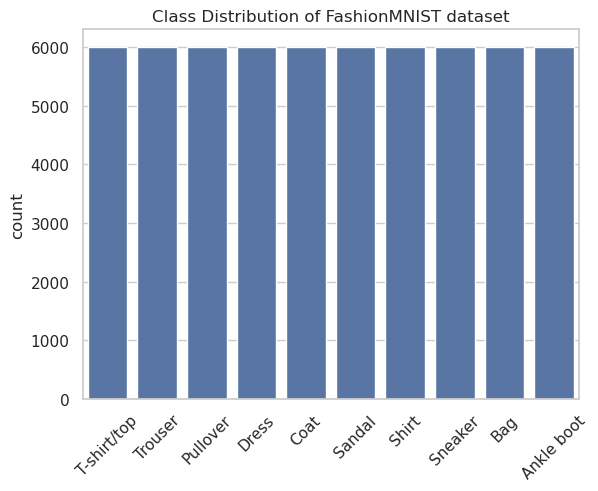

In [ ]:
# Plot class distributions in the fashion MNIST dataset

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sns.countplot(x=train_labels)
plt.xticks(np.arange(10), class_names, rotation=45)
plt.title("Class Distribution of FashionMNIST dataset")
plt.show

'''
We can observe that for each type of fashion accesory there are 6000 instances.
'''

In [ ]:
#                                                                      DATA VISUALIZATION

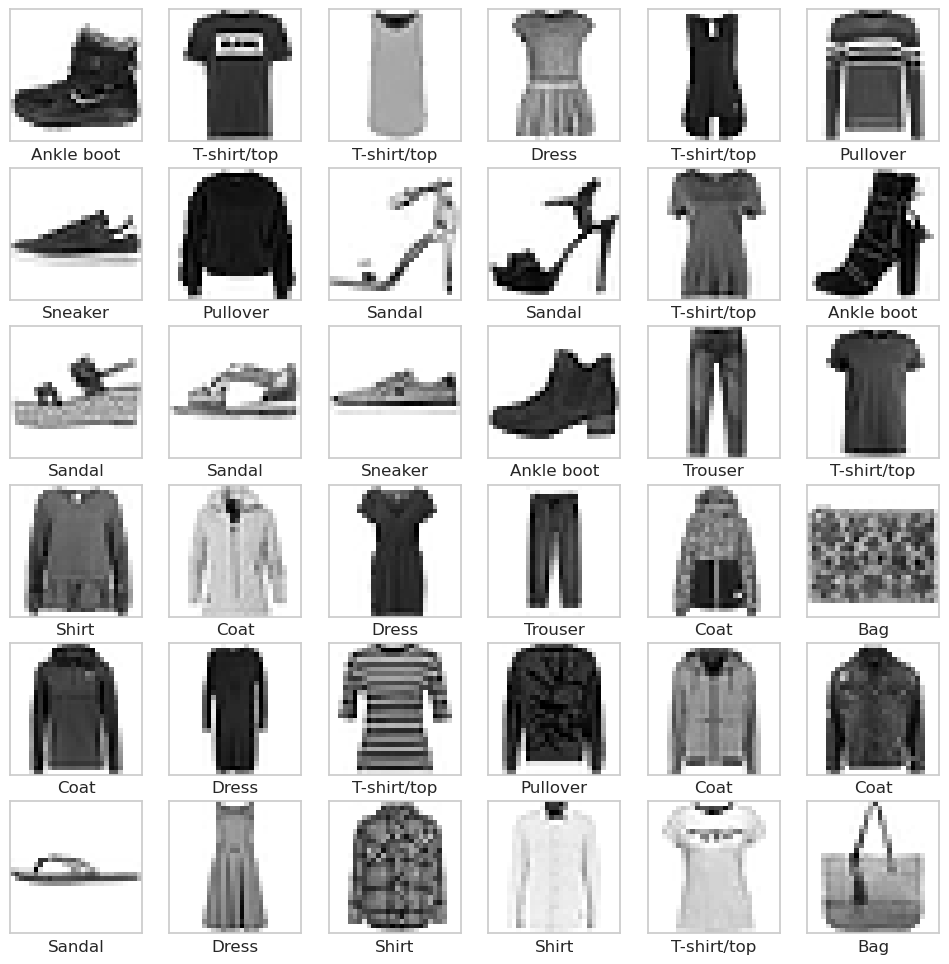

In [ ]:
# Visualizing few images from the fashionMNIST dataset

plt.figure(figsize=(12,12))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fmn_images_scaled_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Compute the covariance matrix of the training data
# Explanation:
# - Covariance matrix captures the relationship between features (pixels in this case).
# - Each element in the covariance matrix indicates how changes in one feature are associated with changes in another.

# Calculate eigenvalues and eigenvectors of the covariance matrix
# Explanation:
# - Eigenvalues represent the amount of variance captured by each principal component.
# - Eigenvectors define the direction of the principal components in the feature space.

mnist_fashion_cov = np.cov(fmn_pd_df_train, rowvar = False)
eval, evect = np.linalg.eig(mnist_fashion_cov)

print("\nCovarience matrix : ", mnist_fashion_cov)
print("\nEigen values : ", eval)
print("\nEigen Vectors : ", evect)


Covarience matrix :  [[1.31736554e-07 1.14758391e-07 1.14459424e-07 ... 7.92262339e-08
  8.52732398e-08 9.62716545e-08]
 [1.14758391e-07 9.53749891e-07 1.65491957e-06 ... 2.39370959e-06
  1.03290380e-06 1.63889309e-07]
 [1.14459424e-07 1.65491957e-06 9.06761225e-06 ... 1.06742951e-05
  3.01881361e-06 5.96717771e-07]
 ...
 [7.92262339e-08 2.39370959e-06 1.06742951e-05 ... 4.58073189e-03
  1.57065665e-03 1.32960813e-04]
 [8.52732398e-08 1.03290380e-06 3.01881361e-06 ... 1.57065665e-03
  1.28283423e-03 1.46193336e-04]
 [9.62716545e-08 1.63889309e-07 5.96717771e-07 ... 1.32960813e-04
  1.46193336e-04 6.62678053e-05]]

Eigen values :  [1.98098057e+01 1.21122105e+01 4.10615661e+00 3.38182839e+00
 2.62477022e+00 2.36084678e+00 1.59744034e+00 1.29982360e+00
 9.20828072e-01 8.96558812e-01 6.77313601e-01 6.22998726e-01
 5.22403760e-01 4.50033978e-01 4.14659933e-01 4.02360864e-01
 3.76515209e-01 3.57800138e-01 3.12489521e-01 3.10740295e-01
 2.95847641e-01 2.77711294e-01 2.62471897e-01 2.54144872

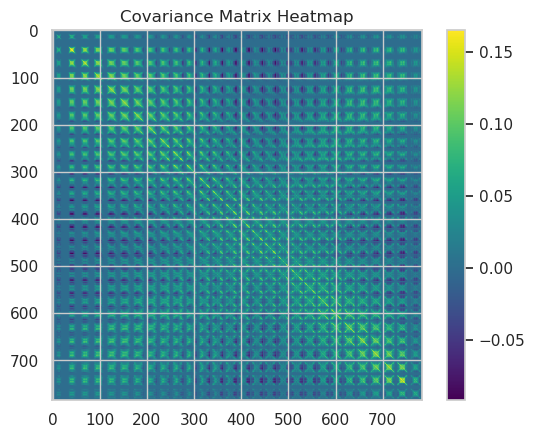

In [ ]:
# Visualizing the covariance matrix using a heatmap
# Explanation:
# - A heatmap provides an intuitive way to inspect the relationships between features.
# - The color intensity represents the magnitude of covariance between pairs of features.

plt.imshow(mnist_fashion_cov, cmap='viridis', interpolation='nearest')
plt.title('Covariance Matrix Heatmap')
plt.colorbar()
plt.show()


# From the below covarience heatmap, we can observe that most of the time we have light blue color between the features saying that they are negatively linearly related.
# We can also observe that few features are strongly negatively related with dark blue color and few features are in yellow indicating strong positive relation
# which means that as there is increase in these values other tend to increase as well.
# We are also seeing the yellow color in the diagonal of the heatmap, it indicates the covariance or correlation of each feature with itself in other words it represents the varince of individual features.
# Since the covariance of a variable with itself is its variance, these diagonal elements reflect the variance of each individual feature.
# The intensity of the color along the diagonal gives you an idea of how much each feature varies from its mean and since its yellow it means that features isgnificantly varies from its mean across the dataset.
# Since we are dealing with image dataset, where each feature represents a pixel, the diagonal elements provide information about how pixel intensities vary within the dataset.
# Bright yellow along the diagonal might suggest that certain pixels have a wide range of intensity values across the images.

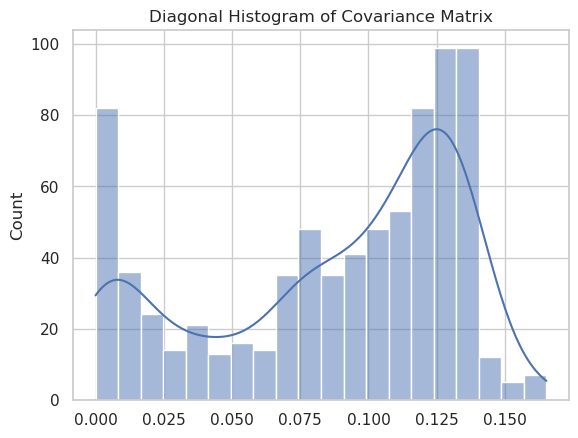

In [ ]:
# Histogram along the diagonal of covarience matrix to visualize the distribution of each feature - pixel intensity patterns for each feature (pixel).


# Histogram along the diagonal of covarience matrix provides insights into the univariate distribution of each feature in the Fashion-MNIST dataset.
# Each bar in the histogram represents the frequency or count of values within a certain range,
# Reflecting the distribution of pixel intensities for a specific feature (pixel) across the entire dataset.
# The shape of each histogram indicates the distribution of pixel intensities for a particular feature. Here we have left-skewed/ negative-skewed which means that it indicates an asymmetry in the distribution
# This means that most pixel values are not clustered around a central value.

# Analysis from histogram of diagonal elements of covarience matrix:
# Histogram is left skewed so data is not clustered around the center.
# The peak(s) in the histogram indicate the most common intensity level(s) for that pixel. This helps understand the typical appearance of that pixel in the images.
# Pixel ranging between 0.125 and 0.15 can be found in most of the images and this way machine can learn the features.

# Plot diagonal histograms using the diagonal of the covariance matrix
sns.set(style="whitegrid")

# Extract the diagonal of the covariance matrix for the histogram
diag_values = np.diag(mnist_fashion_cov)

# Plot diagonal histograms
sns.histplot(diag_values, kde=True, bins=20)
plt.title('Diagonal Histogram of Covariance Matrix')
plt.show()

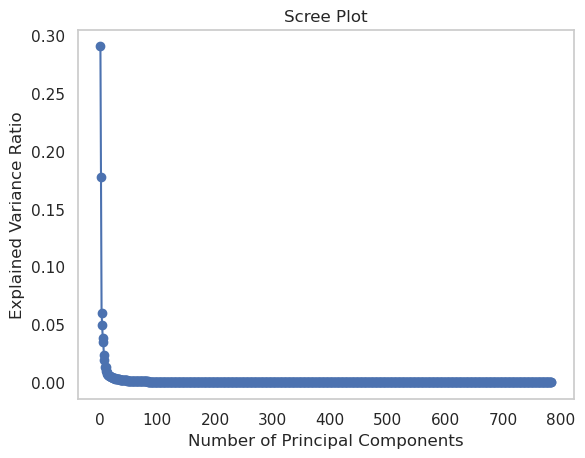

In [ ]:
#Since fashion-MINSt is image dataset, and each image has 784 features,if we say each feature is a dimension and lets say we have 784 dimensions which is a high dimensional data when we take 70,000 images into account.
#To visualize such high dimensional data and interpreting it would be difficult, so we use dimensionality reduction to interpret the dataset.
#PCA allows us to reduce the dimensionality while retaining most of the variability in the data.
#By selecting a subset of principal components, we can project the data into a lower-dimensional space, making it easier to visualize and interpret

#The major aim is to gain insights into the underlying structure and relationships between features of multiple images. Doing this using dimensionality reductions techniques such as PCA would be easier since,
#PCA is computationally efficient and PCA tends to emphasize the most significant patterns in the data and suppress noise or less significant variations.
#this can be done (which PCA does) identifies the directions (principal components) in which the data varies the most.
#When we visualize the data using a subset of these principal components, significant amount of the original variability is retained.
#This allows us to capture the essential patterns and structures in the data.

#Information regarding Scree plot:
  #X-axis: Principle components in decending order
  #Y-axis: Represents the eigenvalues of the principal components
  #Elbow point: This is a point where the slope of the curve sharply decreases.This point is often considered a cutoff for retaining principal components.
                #The number of principal components before the elbow is typically chosen as the dimensionality reduction.
  #Using this scree plot we can see how quickly the eigen values decreases.
  #A steep decline followed by a leveling off suggests that the initial principal components are more important in explaining the variance.



##############################################################################################################################################
#PCA, being a linear technique, may struggle to capture non-linear relationships
#and might not be as effective in revealing the underlying structure of fashion-MINST dataset,
#since fashion-MINST dataset is a image dataset and we have non-linear relationship between features as shown in heatmap of covarience matrix,
#So we also perform t-SNE technique (after PCA) since it can capture non-linear relationship between features.
################################################################################################################################################

#from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA to your data (which is normalized)
pca.fit(fmn_pd_df_train)

# Get the explained variance ratios
explained_var = pca.explained_variance_ratio_

# Create a scree plot
plt.plot(np.arange(1, len(explained_var) + 1), explained_var, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()

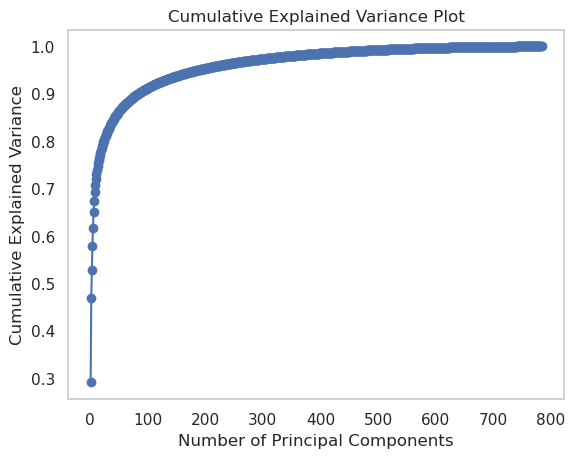

In [ ]:
# Calculate cumulative explained variance
cumulative_explained_var = np.cumsum(explained_var)

# Create a cumulative explained variance plot
plt.figure()
plt.plot(np.arange(1, len(explained_var) + 1), cumulative_explained_var, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()

# Display the plots
plt.show()

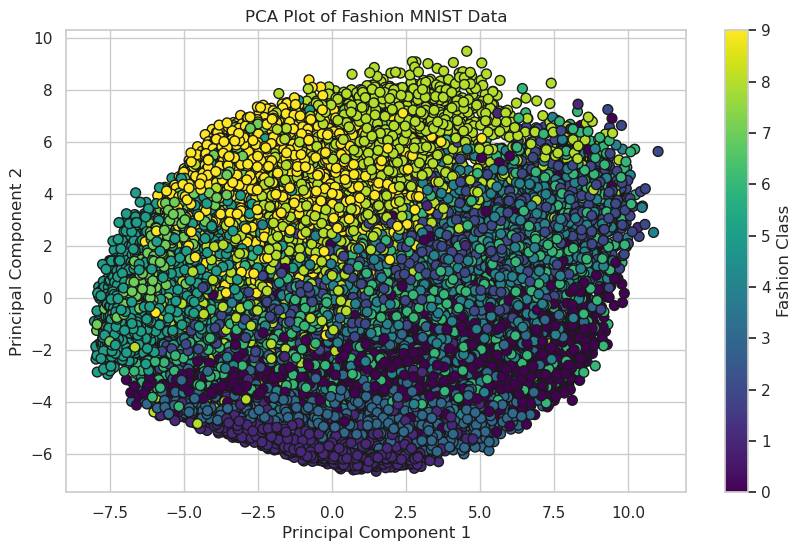

In [ ]:
# Plotting first 2 principle components.
# Each point in PCA represent an image in fashionMINST dataset.we have 2 axis here, x-axis represent 1st principle component which captures the most significant variation in the data.
# y-axis represent 2nd principle component, which is uncorrelated with first principle component.
# we also can see the clustering of the data where yellow points represent class 9 and blue points represent class 3
# we can see overlapping clusters which shows similar feature representations.
#Points that are more spread out along x-axis contribute more to the overall variance in the dataset

#from sklearn.decomposition import PCA
pca=PCA()
# Fit the PCA to your data
pca.fit(fmn_pd_df_train)

# Transform the data using the first two principal components
transformed_data = pca.transform(fmn_pd_df_train)[:, :2]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=label_df_train[0], cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Fashion Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Fashion MNIST Data')
plt.grid(True)
plt.show()

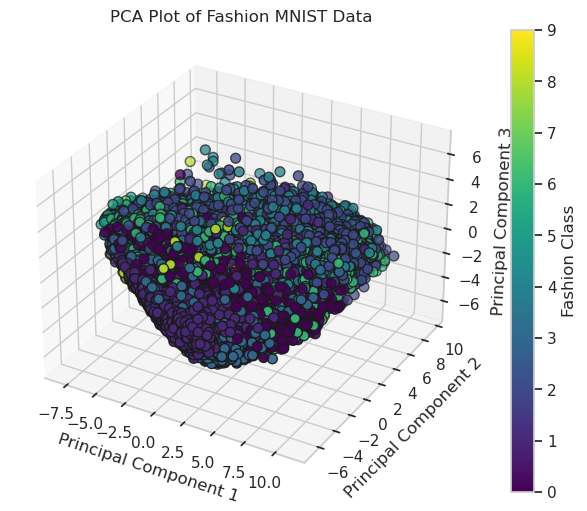

In [ ]:
pca = PCA(n_components=3)  # Set the number of components to 3 for 3D visualization
transformed_data = pca.fit_transform(fmn_pd_df_train)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=label_df_train[0], cmap='viridis', edgecolor='k', s=50)

# Add labels and a colorbar
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Plot of Fashion MNIST Data')
fig.colorbar(scatter, label='Fashion Class')

plt.show()

In [ ]:
first_pc_loadings = pca.components_[0]
print(first_pc_loadings)
#pca.components_ gives us list of lists where each list or row is a principle component and values of each row are weights.These weights indicate the contribution of each pixel to that principal component.
print(len(pca.components_[0]))
# Find the indices of the top N pixels contributing the most to the variance
num_top_pixels = 10  # Number of Classes
top_pixel_indices = np.abs(first_pc_loadings).argsort()[-num_top_pixels:][::-1]

print("Indices of top", num_top_pixels, "pixels contributing the most to variance:", top_pixel_indices)

[ 1.76521515e-07  2.44768364e-06  1.67354171e-05  6.63525771e-05
  1.51859209e-04  2.83234085e-04  4.96338224e-04  1.31995996e-03
  3.46590203e-03  7.77743636e-03  1.43788237e-02  2.10508241e-02
  2.60672938e-02  2.56127506e-02  2.52802903e-02  2.69476244e-02
  2.50452360e-02  1.78939752e-02  1.07691282e-02  5.04778015e-03
  1.99837870e-03  7.65776845e-04  3.16048759e-04  1.73069508e-04
  1.53215640e-04  8.22085156e-05  1.62152187e-05  5.34064065e-07
  4.27525591e-06  1.45817555e-05  5.68703292e-05  2.87179860e-04
  5.87576288e-04  1.52795296e-03  5.48575727e-03  1.36045481e-02
  2.46835889e-02  3.67604881e-02  4.65606201e-02  5.73411034e-02
  6.16755760e-02  5.77426564e-02  5.60117219e-02  6.05348837e-02
  6.09867954e-02  5.18579643e-02  4.17870713e-02  3.01756460e-02
  1.79899014e-02  8.00302966e-03  2.48548699e-03  8.21557174e-04
  6.06704161e-04  3.91792589e-04  1.31286750e-04  9.29480398e-06
  1.56638136e-05  5.40935351e-05  1.83722967e-04  5.79282489e-04
  1.57619444e-03  7.58182

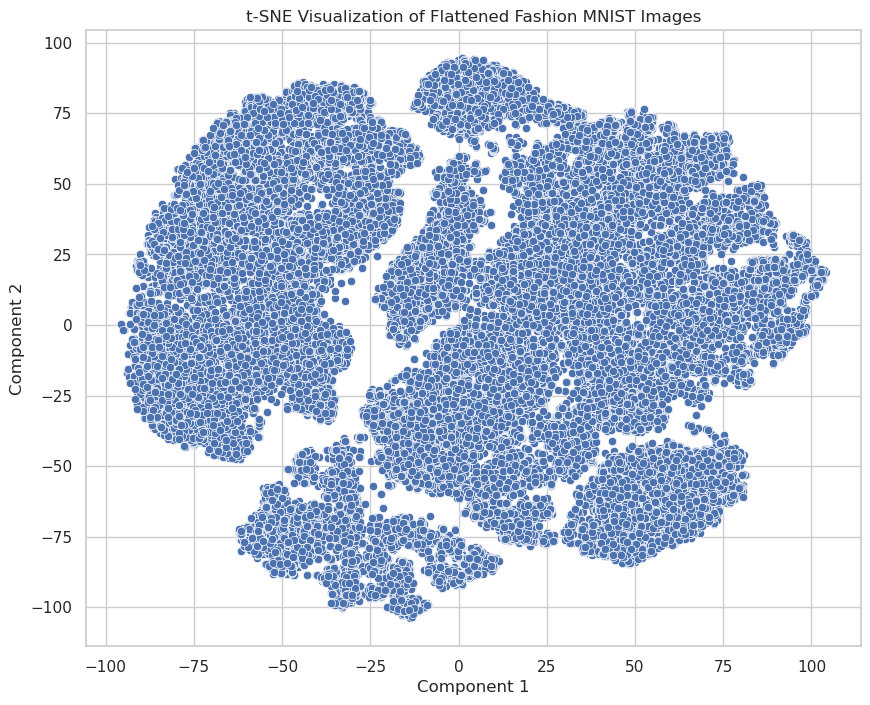

In [ ]:
# Create a t-SNE object with two components for 2D visualization
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_result = tsne.fit_transform(fmn_pd_df_train)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['Component 1', 'Component 2'])

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', data=tsne_df)
plt.title('t-SNE Visualization of Flattened Fashion MNIST Images')
plt.show()


In [ ]:
# Analysis from PCA and t-SNE dimensionality reduction techniques:
# Using PCA plot with the principal component 1 (PC1) on the x-axis and principal component 2 (PC2) on the y-axis, we can visualizing how the data points are distributed in the reduced-dimensional space defined by these two principal components.
# Observing the plot, we can see that the clusters(classes) are very close to each other and are being overlapped. i.e., the patterns captured by the principal components are not distinctive enough to separate the clusters
# Since PCA assumes linear relationship between features and image data is non-linear, PCA is not able to effictively separate the clusters.
# When we performed t-SNE technique and plotted first 2 principle components, we can see that clusters are separated and points belong to one cluster might share similar relationship between features.
# This is evident, since t-SNE does not assume linear relationship between features in dataset. So it can reveal complex relationship in dataset.
# t-SNE is also good at capturing local similarities and global structure of the data.
# The density of points in different regions of the t-SNE plot reflects the data density in the original space.
# Relative distances between clusters can provide insights into the relationships between different groups in the data.

In [ ]:
#                               Splitting Training Dataset into Training and Validation (20% of training is turned into validation set)

In [ ]:
# Splitting the training data into train and validation dataset

# We use our pandas dataframe applied on normalized and flattened dataset.
x_train, x_val, y_train, y_val = train_test_split(fmn_pd_df_train, train_labels, test_size=0.2, random_state=42, stratify=train_labels)
# Print the shapes of the resulting datasets
print("Train set shapes:", x_train.shape, y_train.shape)
print("Validation set shapes:", x_val.shape, y_val.shape)

x_train_flatten = x_train
x_val_flatten = x_val

test_images_flatten = x_test_flatten
print("Test set shapes : ", test_images_flatten.shape, test_labels.shape)

Train set shapes: (48000, 784) (48000,)
Validation set shapes: (12000, 784) (12000,)
Test set shapes :  (10000, 784) (10000,)


# Model Selection - Decision Tree

In [ ]:
# Normalize and flatten the training data
train_images = train_images / 255.0
train_images = train_images.reshape(train_images.shape[0], -1)  # Flatten the images

# Perform PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
train_images_pca = pca.fit_transform(train_images)

# Split the data after PCA transformation
x_train, x_val, y_train, y_val = train_test_split(train_images_pca, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

# Train a Decision Tree Classifier

dt_classifier = DecisionTreeClassifier(random_state=42)
cross_val_scores_pca_dt = cross_val_score(dt_classifier, x_train, y_train, cv=3, scoring='accuracy', verbose=2)

print("Cross-Validation Scores on PCA-converted data:", cross_val_scores_pca_dt)
print("Average Accuracy on PCA-converted data:", np.mean(cross_val_scores_pca_dt))


[CV] END .................................................... total time=  12.8s
[CV] END .................................................... total time=  13.6s
[CV] END .................................................... total time=  12.7s
Cross-Validation Scores on PCA-converted data: [0.7480625 0.7444375 0.7469375]
Average Accuracy on PCA-converted data: 0.7464791666666667


In [ ]:
# Normalize and flatten the test data
test_images = test_images / 255.0
test_images = test_images.reshape(test_images.shape[0], -1)  # Flatten the images

# Transform the test data using the already-fitted PCA
test_images_pca = pca.transform(test_images)

# Fit the Decision Tree Classifier on the PCA-transformed training data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_images_pca, train_labels)

# Predict using the PCA-transformed test data
y_pred_pca = dt_classifier.predict(test_images_pca)

# Calculate and print the accuracy
accuracy_pca = accuracy_score(test_labels, y_pred_pca)
print(f"Accuracy on PCA-converted dataset: {accuracy_pca * 100:.2f}%")


Accuracy on PCA-converted dataset: 76.16%


In [ ]:
x_train_flatten.shape

(48000, 784)

In [ ]:
y_train.shape

(48000,)

Validation results evaluation for Decision Tree
Accuracy: 0.7972
Precision: 0.7978
Recall: 0.7972
F1 Score: 0.7973
Confusion Matrix:
[[ 904    9   27   38   16    3  191    0   11    1]
 [   8 1145    4   27    5    1    8    0    2    0]
 [  31    9  819   24  158    1  138    0   17    3]
 [  64   43   25  934   63    1   51    0   18    1]
 [   7    4  192   62  786    1  136    0   11    1]
 [   3    3    0    4    2 1078    2   63   16   29]
 [ 191    9  157   30  125    1  667    1   18    1]
 [   1    0    0    0    0   63    0 1057    5   74]
 [   9    1   16    7   12   13   22    5 1104   11]
 [   1    0    2    5    2   29    5   77    7 1072]]


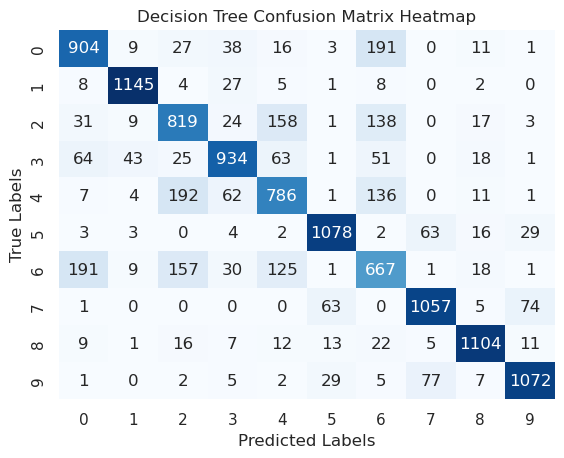

In [ ]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model with training data
dt_classifier.fit(x_train_flatten, y_train)

# Predictions on the validation set
y_val_pred_dt = dt_classifier.predict(x_val_flatten)

# Evaluate parameters on the validation set
accuracy_val_dt = accuracy_score(y_val, y_val_pred_dt)
precision_val_dt = precision_score(y_val, y_val_pred_dt, average='weighted')
recall_val_dt = recall_score(y_val, y_val_pred_dt, average='weighted')
f1_val_dt = f1_score(y_val, y_val_pred_dt, average='weighted')
conf_matrix_val_dt = confusion_matrix(y_val, y_val_pred_dt)

# Print results for the validation dataset
print('Validation results evaluation for Decision Tree')
print(f"Accuracy: {accuracy_val_dt:.4f}")
print(f"Precision: {precision_val_dt:.4f}")
print(f"Recall: {recall_val_dt:.4f}")
print(f"F1 Score: {f1_val_dt:.4f}")
print("Confusion Matrix:")
print(conf_matrix_val_dt)

# Create a heatmap using seaborn for the Decision Tree's confusion matrix
sns.heatmap(conf_matrix_val_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Adjust the number of PCA components
pca = PCA(n_components=100)  # Specify the number of components for PCA

# Apply PCA to the training and validation datasets
X_train_pca = pca.fit_transform(x_train_flatten)
X_val_pca = pca.transform(x_val_flatten)
test_pca = pca.transform(test_images_flatten)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_pca, y_train)

# Predictions on the validation set
y_val_pred_dt = dt_classifier.predict(X_val_pca)

# Predictions on the test set
test_pred_dt = dt_classifier.predict(test_pca)

# Evaluate the accuracy on the validation set
accuracy_val_dt = accuracy_score(y_val, y_val_pred_dt)

# Evaluate the accuracy on the test set
accuracy_test_dt = accuracy_score(test_labels, test_pred_dt)

# Output the accuracies
print(f'Validation Accuracy (Decision Tree): {accuracy_val_dt:.4f}')
print(f'Test Accuracy (Decision Tree): {accuracy_test_dt:.4f}')

Validation Accuracy (Decision Tree): 0.7727
Test Accuracy (Decision Tree): 0.7539


# Model Selection - KNN

In [ ]:
# KNN Cross Validation PCA
knn = KNeighborsClassifier(n_neighbors=5)

cross_val_scores_pca_knn = cross_val_score(knn, train_images_pca, train_labels, cv=3, scoring='accuracy', verbose = 2)

print("Cross-Validation Scores on PCA-converted data:", cross_val_scores_pca_knn)
print("Average Accuracy on PCA-converted data:", np.mean(cross_val_scores_pca_knn))



[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.7s
[CV] END .................................................... total time=   1.6s
Cross-Validation Scores on PCA-converted data: [0.86165 0.8597  0.85905]
Average Accuracy on PCA-converted data: 0.8601333333333333


In [ ]:
knn.fit(train_images_pca, train_labels)
y_test_pred = knn.predict(test_images_pca)

accuracy_test = accuracy_score(test_labels, y_test_pred)
print(f"Accuracy on test set: {accuracy_test * 100:.2f}%")



Accuracy on test set: 86.23%


In [ ]:
#                                                                         Model Selection - Random Forest

In [ ]:
# Why Random Forest was chosen after KNN and Decision Tree:
# 1. Random Forest is an ensemble method that builds multiple decision trees and combines their outputs, leading to better generalization and robustness compared to a single Decision Tree.
# 2. While KNN serves as a simple baseline for classification tasks, its reliance on distance-based decisions makes it computationally expensive for large datasets like Fashion-MNIST.
# 3. Decision Tree, while interpretable, often suffers from overfitting, especially on complex datasets. Random Forest mitigates this by averaging predictions from multiple trees, reducing overfitting.
# 4. Random Forest handles high-dimensional data effectively by selecting the most important features at each split, which is advantageous for datasets like Fashion-MNIST with numerous features (pixels).
# 5. It is less sensitive to scaling and normalization, making it a robust choice for image data where preprocessing steps like normalization might not always be ideal.
# 6. Random Forest provides feature importance metrics, which can be valuable for understanding which pixels (features) are most significant in classification tasks.
# 7. Compared to KNN and Decision Tree, Random Forest strikes a balance between interpretability, computational efficiency, and accuracy, making it a strong candidate for this project.


#HYPER-PARAMETERS FOR Random Forest classifier:

    # n_estimators : Number of trees in the forest, Increasing number of trees would increase computational cost but also would increase performance until saturated.
    # criterion : The function used to measure the quality of split. Gini Impurity, Entropy and loss log
    # max_depth : The maximum depth of each decision tree in the forest. Increasing the maximum depth can lead to a more complex model, which may lead to overfitting.
    # min_samples_split : The minimum number of samples required to split an internal node. Increasing this value can help prevent overfitting.
    # min_samples_leaf : The minimum number of samples required to be at a leaf node. This can be tuned to control overfitting.
    # max_features : Number of features to consider when looking for the best split.If "auto," it uses all features; if "sqrt," it uses the square root of the number of features; if "log2," it uses the base-2 logarithm of the number of features
    # bootstrap : Whether to use bootstrapped samples when building trees. By default it is set to True
    # random_state : Controls the randomization of the algorithm. If a fixed integer is provided, the algorithm will produce the same results each time it is run


In [ ]:
#                                                                         Model Building

validation results evaluation 
Accuracy: 0.8827
Precision: 0.8820
Recall: 0.8827
F1 Score: 0.8816
Confusion Matrix:
[[1043    0   19   33    5    1   91    0    8    0]
 [   2 1163    6   24    1    1    3    0    0    0]
 [   7    0  969   14  142    0   60    0    8    0]
 [  30    5   14 1090   35    0   24    0    2    0]
 [   1    0  102   45  984    0   62    0    6    0]
 [   0    0    0    0    0 1156    0   29    3   12]
 [ 167    2  139   27  101    0  751    0   13    0]
 [   0    0    0    0    0   20    0 1128    3   49]
 [   0    1    3    5    6    4   10    1 1170    0]
 [   0    0    2    0    0   16    0   43    1 1138]]


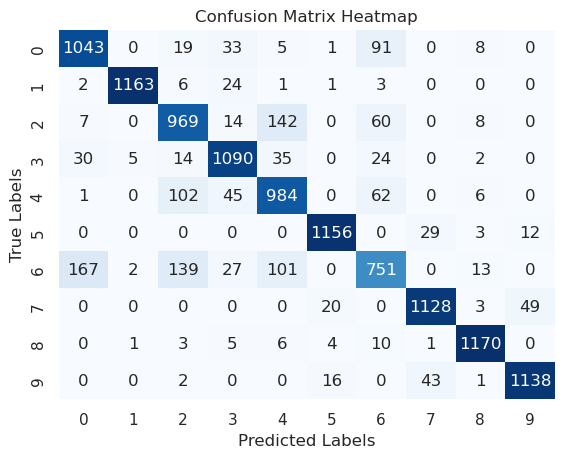

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

#Fit the model with training data
rf_classifier.fit(x_train_flatten, y_train)

# Predictions on the validation set
y_val_pred = rf_classifier.predict(x_val_flatten)

# Evaluate parameters on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted')
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Print results for the validation dataset
print('validation results evaluation ')
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")
print("Confusion Matrix:")
print(conf_matrix_val)



import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



# Create a heatmap using seaborn
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()


In [ ]:
test_images_flatten.shape

(10000, 784)

In [ ]:
test_pca = pca.transform(test_images_flatten)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

#Fit the model with training data
rf_classifier.fit(x_train_flatten, y_train)

# Predictions on the validation set
test_pred_rt = rf_classifier.predict(test_images_flatten)

# Evaluate parameters on the validation set
accuracy_test = accuracy_score(test_labels, test_pred_rt)

print(f"Accuracy: {accuracy_val:.4f}")

Accuracy: 0.8827


In [ ]:
pca = PCA(n_components=100)  # Adjust the number of components as needed

X_train_pca = pca.fit_transform(x_train_flatten)

X_val_pca = pca.transform(x_val_flatten)

test_pca = pca.transform(test_images_flatten)

# Train a Random Forest Classifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_pca, y_train)

# Predictions on the validation set
y_val_pred = rf_classifier.predict(X_val_pca)

test_pred = rf_classifier.predict(test_pca)

accuracy_test = accuracy_score(test_labels, test_pred)

# Evaluate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {accuracy:.4f}')

print(f'Test Accuracy: {accuracy_test:.4f}')

Validation Accuracy: 0.8701
Test Accuracy: 0.8587


# CNN Code

In [ ]:
# Why CNN was used for Fashion-MNIST classification:
# 1. Tailored for Image Data:
#    - CNNs are specifically designed for image-related tasks as they can effectively capture spatial hierarchies and patterns (e.g., edges, textures).
#    - Unlike traditional ML models like Random Forest or KNN, which rely on flattened feature vectors, CNNs process image data in its original 2D form, preserving spatial relationships.

# 2. Feature Extraction:
#    - CNNs automatically learn hierarchical features from the data, such as edges, shapes, and textures, without the need for manual feature engineering.
#    - Early layers capture simple patterns (e.g., edges), while deeper layers extract more complex features, enabling better classification of clothing items in Fashion-MNIST.

# 3. Performance Advantage:
#    - CNNs achieve higher accuracy on complex datasets like Fashion-MNIST because they excel at identifying subtle differences between similar classes (e.g., T-shirts vs. shirts).
#    - The convolutional and pooling layers in CNNs reduce computational complexity while retaining essential information, making them efficient for large datasets.

# 4. Robustness and Generalization:
#    - CNNs use techniques like dropout and regularization to minimize overfitting, making them robust when applied to unseen data.
#    - Data augmentation techniques (e.g., rotation, flipping, zooming) further enhance generalization by exposing the model to variations of the training data.

# 5. Comparative Superiority:
#    - Compared to KNN and Random Forest, which rely on fixed feature representations, CNNs adaptively learn features during training, leading to better performance.
#    - Traditional models struggle with the high dimensionality of image data, whereas CNNs are designed to handle such complexity efficiently.

# 6. Real-World Applications:
#    - CNNs are widely used in real-world image classification tasks across industries like fashion, retail, healthcare, and autonomous vehicles.
#    - Their proven success in similar benchmarks (e.g., MNIST) makes CNNs a natural choice for Fashion-MNIST classification.

# 7. Scalability:
#    - CNN architectures can be extended or fine-tuned for more complex tasks, offering scalability for future applications or larger datasets.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.optimizers import SGD

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("x_val original shape", x_val.shape)
print("y_val original shape", y_val.shape)

X_train original shape (48000, 28, 28)
y_train original shape (48000,)
x_val original shape (12000, 28, 28)
y_val original shape (12000,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for Training Dataset:
# - We use TensorFlow's ImageDataGenerator to apply real-time data augmentation to the training data.
# - Data augmentation artificially expands the dataset by creating modified versions of the existing images,
#   introducing variability that helps the model generalize better and avoid overfitting.
# - The following augmentation techniques are applied:
#   1. Rotation: Randomly rotates images within a range of 10 degrees to simulate orientation variations.
#   2. Width Shift: Horizontally shifts images by up to 10% of their width to account for horizontal misalignments.
#   3. Height Shift: Vertically shifts images by up to 10% of their height to simulate vertical misalignments.
#   4. Shear: Applies a geometric distortion by shearing images within a range of 10%.
#   5. Zoom: Randomly zooms into images by up to 10%, helping the model handle varying object sizes.
#   6. Horizontal Flip: Flips images horizontally to introduce mirrored versions of the original images, useful for datasets with symmetric objects (e.g., clothing).
# - The `fit` method computes the required statistics for normalization and applies these augmentations to the training dataset.
# - The training dataset is reshaped to (num_samples, height, width, channels) format (required for image processing),
#   where channels=1 as Fashion-MNIST contains grayscale images.

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train.reshape(-1, 28, 28, 1))

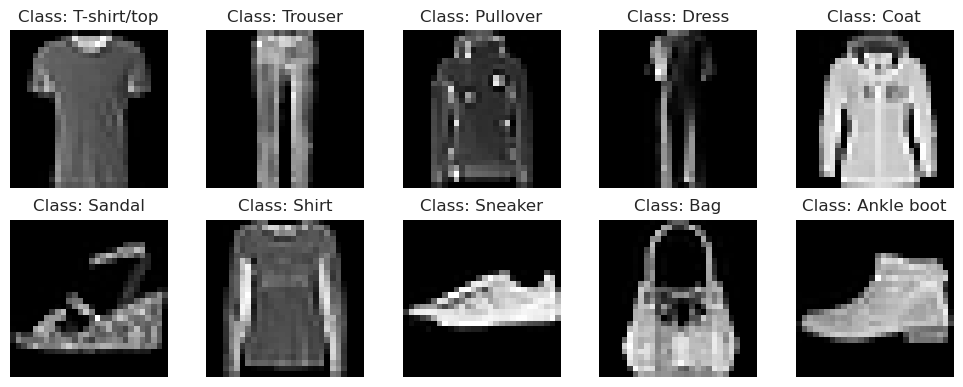

In [ ]:
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')

plt.tight_layout()

In [ ]:
# Reshape images to 1D vectors (28x28 -> 784)
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
x_val = x_val.reshape(x_val.shape[0], 784)
# Convert pixel values to float for numerical stability
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
x_val = x_val.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
print("Validation matrix shape", x_val.shape)

Training matrix shape (48000, 784)
Testing matrix shape (10000, 784)
Validation matrix shape (12000, 784)


In [ ]:
# Normalize the data
X_train /= 255
X_test /= 255
x_val /= 255

In [ ]:
num_classes = 10 # There are 10 classes possible

# Convert class labels to one-hot encoded format
Y_train = to_categorical(y_train, num_classes)
Y_val = to_categorical(y_val, num_classes)
Y_test = to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()  # Declare a Sequential model
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))  # Input layer with Conv2D
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Second Conv2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer

model.add(Flatten())  # Flatten the output of the Conv2D layers to connect to Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))  # Output layer with 10 classes

2024-11-21 21:24:47.819900: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
num_epoch = 100

history = model.fit(datagen.flow(X_train.reshape(-1, 28, 28, 1), Y_train, batch_size=128),
                    epochs=num_epoch,
                    verbose=1,
                    validation_data=(x_val.reshape(-1, 28, 28, 1), Y_val))

2024-11-21 21:24:48.038854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/100
375/375 [==============================] - 20s 51ms/step - loss: 0.7713 - accuracy: 0.7075 - val_loss: 0.5363 - val_accuracy: 0.8019
Epoch 2/100
375/375 [==============================] - 19s 50ms/step - loss: 0.5399 - accuracy: 0.7922 - val_loss: 0.4081 - val_accuracy: 0.8472
Epoch 3/100
375/375 [==============================] - 19s 50ms/step - loss: 0.4680 - accuracy: 0.8224 - val_loss: 0.3703 - val_accuracy: 0.8566
Epoch 4/100
375/375 [==============================] - 19s 50ms/step - loss: 0.4271 - accuracy: 0.8385 - val_loss: 0.3735 - val_accuracy: 0.8589
Epoch 5/100
375/375 [==============================] - 19s 49ms/step - loss: 0.3974 - accuracy: 0.8490 - val_loss: 0.3218 - val_accuracy: 0.8817
Epoch 6/100
375/375 [==============================] - 19s 49ms/step - loss: 0.3816 - accuracy: 0.8540 - val_loss: 0.3162 - val_accuracy: 0.8821
Epoch 7/100
375/375 [==============================] - 19s 51ms/step - loss: 0.3690 - accuracy: 0.8610 - val_loss: 0.3244 - val_ac

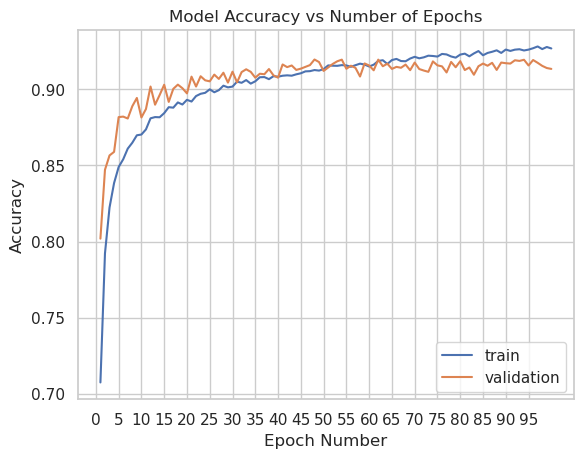

In [ ]:
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'validation'], loc='best')
plt.xticks(np.arange(0,num_epoch,5))
plt.show()

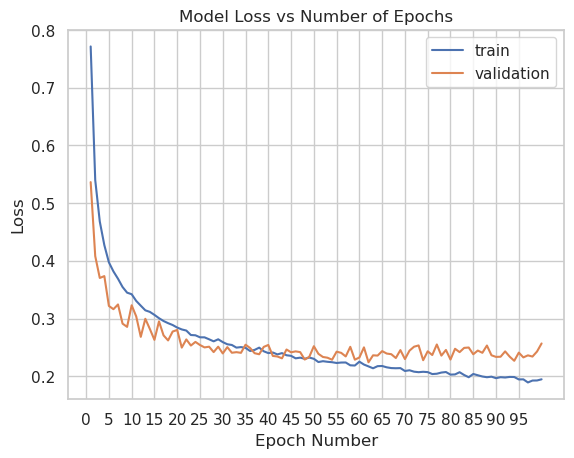

In [ ]:
plt.plot(range(1,1+len(history.history['loss'])), history.history['loss'])
plt.plot(range(1,1+len(history.history['val_loss'])), history.history['val_loss'])
plt.title('Model Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['train', 'validation'], loc='best')
plt.xticks(np.arange(0,num_epoch,5))
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))
y_pred = np.argmax(y_pred, axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
target_names = [class_labels_dict[x] for x in range(0,10)]
print(classification_report(y_test, y_pred, target_names=target_names))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.84      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.83      0.86      1000
       Dress       0.93      0.90      0.91      1000
        Coat       0.83      0.87      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.72      0.78      0.75      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.9093


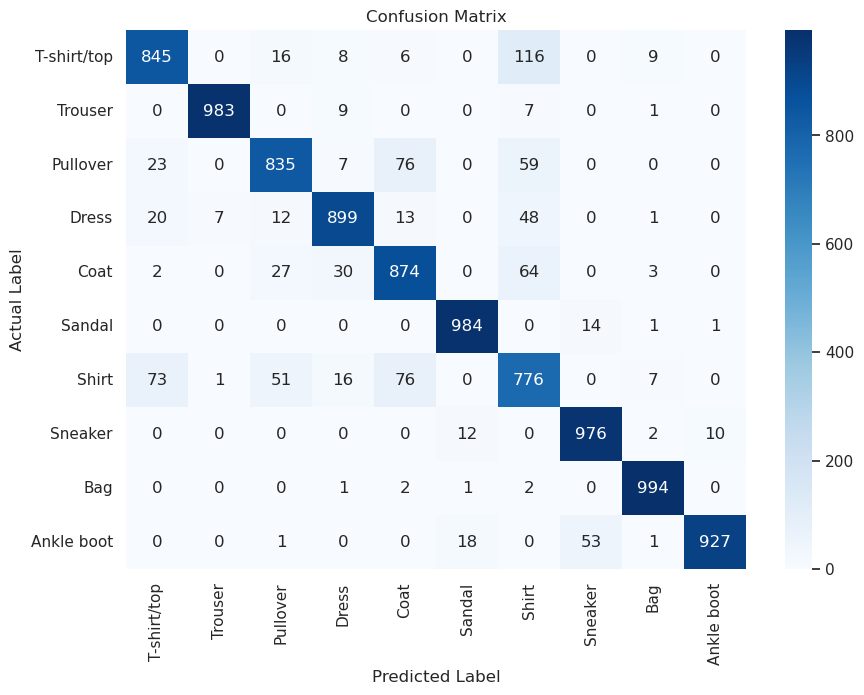

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
matrix_df = pd.DataFrame(conf_mat, index=target_names, columns=target_names)
matrix_df.index.name = 'Actual'
matrix_df.columns.name = 'Predicted'

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# Evaluate parameters on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted')
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Print results for the validation dataset
print('validation results evaluation ')
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")
print("Confusion Matrix:")
print(conf_matrix_val)

In [ ]:
!pip install keras-tuner --upgrade

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout)
from tensorflow.keras.optimizers import Adam

In [ ]:
# Use hyperparameter tuner to auto tune the parameters

def build_model(hp):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=100,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='hyperparam_tuning'
)

Reloading Tuner from my_dir/hyperparam_tuning/tuner0.json


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

callbacks = [early_stopping]

tuner.search(
    datagen.flow(X_train.reshape(-1, 28, 28, 1), Y_train, batch_size=128),
    epochs=50,
    validation_data=(x_val.reshape(-1, 28, 28, 1), Y_val),
    callbacks=callbacks
)

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
model = tuner.hypermodel.build(best_hps)

# Optionally, retrain the model
history = model.fit(
    datagen.flow(X_train.reshape(-1, 28, 28, 1), Y_train, batch_size=128),
    epochs=num_epoch,
    validation_data=(x_val.reshape(-1, 28, 28, 1), Y_val),
    callbacks=callbacks
)

test_loss, test_acc = model.evaluate(X_test.reshape(-1, 28, 28, 1), Y_test)
print('Test Accuracy:', test_acc)

Epoch 1/100


2024-11-21 22:17:38.548903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


375/375 [==============================] - 18s 47ms/step - loss: 0.8412 - accuracy: 0.6894 - val_loss: 0.5322 - val_accuracy: 0.7941
Epoch 2/100
375/375 [==============================] - 18s 47ms/step - loss: 0.5796 - accuracy: 0.7831 - val_loss: 0.4346 - val_accuracy: 0.8431
Epoch 3/100
375/375 [==============================] - 18s 47ms/step - loss: 0.5134 - accuracy: 0.8085 - val_loss: 0.4016 - val_accuracy: 0.8509
Epoch 4/100
375/375 [==============================] - 17s 46ms/step - loss: 0.4747 - accuracy: 0.8211 - val_loss: 0.3777 - val_accuracy: 0.8600
Epoch 5/100
375/375 [==============================] - 18s 47ms/step - loss: 0.4429 - accuracy: 0.8349 - val_loss: 0.3725 - val_accuracy: 0.8591
Epoch 6/100
375/375 [==============================] - 17s 46ms/step - loss: 0.4171 - accuracy: 0.8435 - val_loss: 0.3608 - val_accuracy: 0.8649
Epoch 7/100
375/375 [==============================] - 17s 46ms/step - loss: 0.4020 - accuracy: 0.8496 - val_loss: 0.3338 - val_accuracy: 0.87

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
for hp in best_hps.values:
    print(f"{hp}: {best_hps.get(hp)}")


Best Hyperparameters:
conv1_filters: 32
conv1_kernel: 3
conv2_filters: 256
conv2_kernel: 3
dense_units: 384
dropout_rate: 0.30000000000000004
learning_rate: 0.0004272970012783842


# Model Interpretation

The accuracy and loss performances of our CNN model contribute to its interpretability and learning curve. The model, while being trained for over 100 epochs, showed a gradual increase in accuracy by reducing the loss. The training and validation accuracies were stabilized at around 92.5% and 91.3%, respectively. The proximity in the training and validation curves ensures that the model generalizes well with minimal overfitting. The sharp improvements during the first few epochs suggest that it learned basic features such as edges and simple shapes rapidly, while the gains in later epochs are due to its capability to fine-tune higher-order information like textures and structural hierarchies of fashion items. Minor fluctuations of the validation loss during the later epochs hint at sensitivities of the objective for subtleties in the data but at the same time confirm robustness against overfitting. These results highlight the CNN's capacity to effectively capture and generalize meaningful spatial features, ensuring reliable classification of unseen fashion items.

# Business Insights

The CNN developed for FashionMNIST has great commercial potential to be used in both the fashion and retail industries by automating the classification of images and improving the customer experience. It can be integrated into e-commerce platforms to automatically categorize and tag products, reducing manual effort and improving inventory management. Visual search capabilities enabled by the model can also allow customers to upload images and find similar items, personalizing the shopping experience and driving engagement. It can help in the sorting and quality control in warehouses in real time. Additionally, this may enable a business to understand customer preferences by analyzing the trends in the classified items and make data-driven decisions for inventory and marketing strategy. This integration can ultimately optimize efficiency, improve customer satisfaction, and increase revenue in the competitive market.